In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
arr = np.array([[1,2,np.nan], [np.nan, 3, 4]])

In [3]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [4]:
dframe1 = DataFrame(arr, index=list('AB'), columns=['One', 'Two', 'Three'])

In [5]:
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [6]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [7]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [8]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [9]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [10]:
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [11]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [12]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [15]:
import pandas_datareader.data as pdweb

In [22]:
import quandl
import datetime

In [25]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.datetime.now()
start = datetime.datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    globals()[stock] = quandl.get('WIKI/{}'.format(stock), start_date=start, end_date=end)

In [28]:
prices = pdweb.get_data_yahoo(['CVX', 'XCM', 'BP'],
                              start=start, end=end)['Adj. Close']

ImmediateDeprecationError: 
Yahoo Actions has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


In [30]:
# We can get data with this following way
import pandas_datareader as pdr
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 1)
prices = pdr.DataReader(['CVX','XOM','BP'], 'google', start, end)['Close']
prices.head()

/usr/local/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)
/usr/local/lib/python3.6/site-packages/pandas_datareader/base.py:226: SymbolWarning: Failed to read symbol: 'CVX', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


,BP,CVX,XOM
Date,,,
2010-01-04,59.15,NaN,69.15
2010-01-05,59.57,NaN,69.42
2010-01-06,59.88,NaN,70.02
2010-01-07,59.86,NaN,69.80
2010-01-08,60.00,NaN,69.52


In [31]:
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,59.15,NaN,69.15
2010-01-05,59.57,NaN,69.42
2010-01-06,59.88,NaN,70.02
2010-01-07,59.86,NaN,69.80
2010-01-08,60.00,NaN,69.52


In [32]:
rets = prices.pct_change()

In [34]:
rets.head()

,BP,CVX,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007101,NaN,0.003905
2010-01-06,0.005204,NaN,0.008643
2010-01-07,-0.000334,NaN,-0.003142
2010-01-08,0.002339,NaN,-0.004011


In [35]:
%matplotlib inline

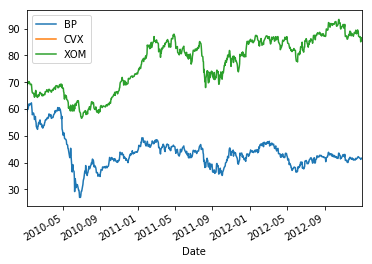

In [36]:
prices.plot()

In [37]:
rets.corr()

,BP,CVX,XOM
BP,1.000000,NaN,0.617595
CVX,NaN,NaN,NaN
XOM,0.617595,NaN,1.000000


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

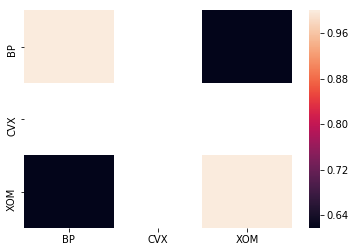

In [39]:
sns.heatmap(rets.corr())

In [40]:
ser1 = Series(['w', 'w', 'x', 'y', 'x', ' w', 'y'])

In [41]:
ser1.unique()

array(['w', 'x', 'y', ' w'], dtype=object)

In [42]:
ser1.value_counts()

x     2
y     2
w     2
 w    1
dtype: int64